In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.4 MB/s eta 0:00:00


**Ex1** În documentaţia pgmpy găsiţi formularea şi implementarea celebrei probleme Monty Hall. Cerinţa acestui exerciţiu
este să explicaţi problema şi codul din implementare.

# **REZOLVARE:**

Problema Monty Hall este un puzzle probabilistic bazat pe un TV-show american. In joc, un participant are trei usi dintre care trebuie sa aleaga. In spatele uneia dintre ele se afla o masina (premiul), iar in spatele celorlalte doua usi se afla cate o capra. Participantul alege o usa. Gazda, Monty Hall, care stie ce se afla in spatele fiecarei usi, deschide una dintre celelalte doua usi, aratand o capra. Acum participantul trebuie sa decida daca schimba alegerea initiala sau ramane la usa aleasa initial. Intuitia ne-ar putea face sa credem ca sansele sunt 50-50, dar, in realitate, schimbarea usii creste probabilitatea de castig la 2/3.

Explicatia codului Monty Hall in pgmpy: documentatia pgmpy include o implementare pentru modelarea problemei folosind retele bayesiene. Se creeaza un model bayesian in care variabilele includ:

- Usa premiului
- Usa aleasa de concurent
- Usa deschisa de gazda

Se definesc CPD-urile pentru fiecare variabila, care reprezinta distributiile de probabilitate asociate fiecarei actiuni:

- CPD pentru usa premiului (distributie uniforma intre cele trei usi),
- CPD pentru usa aleasa de concurent,
- CPD pentru usa deschisa de Monty, conditionata de usa premiului si usa aleasa.

Dupa ce modelul este creat si CPD-urile sunt adaugate, se foloseste inferenta bayesiana pentru a calcula probabilitatea de castig daca concurentul schimba sau nu usa dupa ce Monty deschide una.

**Ex. 2** Un medic doreşte să determine probabilitatea ca un pacient să aibă o anumită boală pulmonară (B), având în vedere simptomele observate.

Există trei variabile observabile care pot indica prezenţa bolii: tuse (T), dificultate de respiraţie (D), radiografie anormală (X). Toate acestea sunt variabile binare. De asemenea, ştim că:

● Dacă pacientul are boala (B), există o probabilitate ridicată să aibă tuse şi să apară anomalii la radiografie.

● Dificultatea de respiraţie (D) este dependentă atât de prezenţa bolii pulmonare (B), cât şi de prezenţa tusei (T).


Astfel, datele de probabilitate condiţionată sunt următoarele:
1. Probabilitatea apriori pentru boala pulmonară:
P(B = 1) = 0.1, P(B = 0) = 0.9;
2. Probabilitatea condiţionată pentru tuse (T) condiţionată de boală (B):
P(T = 1∣B = 1) = 0.8, P(T = 1∣B = 0) = 0.3;
3. Probabilitatea condiţionată pentru radiografie anormală (X) condiţionată de boală (B):
P(X = 1∣B = 1) = 0.9, P(X = 1∣B = 0) = 0.1;

4. Probabilitatea condiţionată pentru dificultate de respiraţie (D), condiţionată de boală (B) şi tuse (T):

P(D = 1∣B = 1,T = 1) = 0.9, P(D = 1∣B = 1,T = 0) = 0.4;
P(D = 1∣B = 0,T = 1) = 0.5, P(D = 1∣B = 0,T = 0) = 0.1.

1. Definiti modelul probabilist, folosind pgmpy, care sa descrie contextul de mai sus.
2. Medicul observă că pacientul are tuse şi dificultăţi de respiraţie. Determinaţi probabilitatea ca pacientul să aibă
boala pulmonară.

3. Ulterior se descoperă (cu alte mijloace) că pacientul nu avea boala pulmonară. Care este probabilitatea ca radio-
grafia să fi fost anormală?

4. Bonus: Calculaţi cele 2 probabilităţi folosind regula lui Bayes şi incărcaţi calculul fie în Markdown/Latex, fie ca foto
la foia de lucru (indicaţie: puteţi să vă folosiţi de independenţele condiţionale rezultate din modelul de reţea bayesiană)

In [ ]:
# 1)
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# creare model Bayesian
model = BayesianNetwork([
    ('B', 'T'),   # Boala (B) influenteaza tusea (T)
    ('B', 'X'),   # Boala (B) influenteaza radiografia (X)
    ('B', 'D'),   # Boala (B) influenteaza dificultatea de respiratie (D)
    ('T', 'D')    # Tusea (T) influenteaza dificultatea de respiratie (D)
])

# Definirea CPD-urilor
cpd_b = TabularCPD(variable='B', variable_card=2, values=[[0.9], [0.1]])  # P(B)
cpd_t = TabularCPD(variable='T', variable_card=2,
                   values=[[0.7, 0.2], [0.3, 0.8]],
                   evidence=['B'], evidence_card=[2])  # P(T|B)
cpd_x = TabularCPD(variable='X', variable_card=2,
                   values=[[0.9, 0.1], [0.1, 0.9]],
                   evidence=['B'], evidence_card=[2])  # P(X|B)
cpd_d = TabularCPD(variable='D', variable_card=2,
                   values=[[0.9, 0.5, 0.6, 0.1], [0.1, 0.5, 0.4, 0.9]],
                   evidence=['B', 'T'], evidence_card=[2, 2])  # P(D|B,T)

# Adaugare CPD-urile in model
model.add_cpds(cpd_b, cpd_t, cpd_x, cpd_d)

# Verificarea modelului
assert model.check_model()

In [ ]:
# b)
# Inference pentru determinarea probabilitatilor
inference = VariableElimination(model)

# P(B | T=1, D=1)
query_result = inference.query(variables=['B'], evidence={'T': 1, 'D': 1})
print(query_result)

In [ ]:
# c) # P(X | B=0)
query_result_x = inference.query(variables=['X'], evidence={'B': 0})
print(query_result_x)

d) Probabilitatea ca pacientul sa aiba boala pulmonara, stiind ca are tuse si dificultati de respiratie:
___
Folosim regula lui Bayes:


P(B=1 | T=1, D=1) = P(T=1, D=1 | B=1) * P(B=1)/P(T=1, D=1)
___

Calculam fiecare termen:

P(T=1, D=1 | B=1) = P(T=1 | B=1) * P(D=1 | B=1, T=1) = 0.8 * 0.9 = 0.72

Din date avem:

P(T=1 | B=1) = 0.8

P(D=1 | B=1, T=1) = 0.9
___

P(T=1, D=1 | B=0) = P(T=1 | B=0) * P(D=1 | B=0, T=1) = 0.3 * 0.5 = 0.15

Din date avem:

P(T=1 | B=0) = 0.3

P(D=1 | B=0, T=1) = 0.5

___

P(T=1, D=1) = P(T=1, D=1| B=1)*P(B=1) + P(T=1, D=1| B=0)*P(B=0) = (0.72 * 0.1) + (0.15 * 0.9) = 0.072 + 0.135 = 0.207
___
P(B=1 | T=1, D=1) = 0.72 *cdot 0.1/0.207 = 0.072/0.207 = approx 0.348

Probabilitatea ca pacientul sa aiba boala pulmonara este de aproximativ **34.8%**.
___
Probabilitatea ca radiografia sa fie anormala (X = 1), stiind ca pacientul nu are boala (B = 0)

P(X=1 | B=0) = 0.1

Probabilitatea ca radiografia sa fie anormala, daca pacientul nu are boala, este **10%**.


**Ex3**  Un joc între doi jucători, J0 şi J1, se desfăşoară în felul următor:

● se aruncă mai întâi cu o monedă (normală) pentru a decide cine începe: J0 sau J1;

● în prima rundă, jucătorul desemnat aruncă cu propriul zar; fie n numărul obţinut;

● în a doua rundă, celălalt jucător aruncă cu moneda proprie de 2n ori; fie m numărul de steme obţinute.

Jucătorul din prima rundă câştigă dacă n ≥ m, în caz contrar câştigând jucătorul din a doua rundă. Mai ştim că
jucătorul J1 este necinstit, el aducând o monedă măsluită, cu probabilitatea de obţinere a stemei egală cu 4/7. În schimb,
moneda jucătorului J0 este normală, iar cele două zaruri sunt şi ele normale.
1. Estimaţi care dintre cei doi jucători are şansele cele mai mari de câştig, simulând un joc de 10000 ori.
2. Folosind pgmpy, definiţi o reţea Bayesiană care sa descrie contextul de mai sus.
3. Folosind modelul de mai sus, determinaţi cine e cel mai probabil să fi început jocul, ştiind că în a doua rundă s-a
obţinut o singură stemă.

In [16]:
# a)
import numpy as np
from collections import Counter

def joc():

  cine_incepe=np.random.choice(['J0','J1'],p=[0.5,0.5])
  if(cine_incepe=='J0'):
   al_doilea='J1'
  else:
   al_doilea='J0'

  n=np.random.choice(range(1,7))
  if al_doilea=='J1':
   m=np.random.choice(['head','tail'],2*n,p=[4/7,3/7])
  else:
   m=np.random.choice(['head','tail'],2*n,p=[0.5,0.5])

  num_heads = np.count_nonzero(m == 'head')

  if num_heads <= n:
    return cine_incepe
  else:
    return al_doilea

#simulare joc
results = [joc() for _ in range(10000)]
# Count wins for each player
win_counts = Counter(results)

# Calculate win percentages
j0_wins = win_counts['J0']
j1_wins = win_counts['J1']
j0_win_percentage = (j0_wins / 10000) * 100
j1_win_percentage = (j1_wins / 10000) * 100

# Display results
print(f"J0 Wins: {j0_wins} games ({j0_win_percentage:.2f}%)")
print(f"J1 Wins: {j1_wins} games ({j1_win_percentage:.2f}%)")

if j0_wins > j1_wins:
    print("J0 has the higher chance of winning.")
else:
    print("J1 has the higher chance of winning.")

J0 Wins: 4234 games (42.34%)
J1 Wins: 5766 games (57.66%)
J1 has the higher chance of winning.


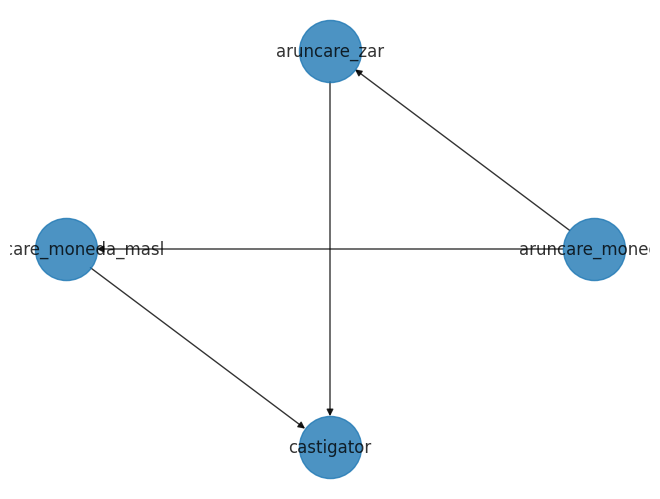

[<TabularCPD representing P(aruncare_moneda:2) at 0x78f2eb6d41f0>, <TabularCPD representing P(aruncare_zar:6 | aruncare_moneda:2) at 0x78f3bd6bc250>, <TabularCPD representing P(aruncare_moneda_masl:2 | aruncare_moneda:2) at 0x78f2eb569300>, <TabularCPD representing P(castigator:2 | aruncare_zar:6, aruncare_moneda_masl:2) at 0x78f2eb6d4640>]


In [4]:
# b)
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

# Definirea rețelei bayesiene
game_model = BayesianNetwork([
    ('aruncare_moneda', 'aruncare_zar'),
    ('aruncare_moneda', 'aruncare_moneda_masl'),
    ('aruncare_zar', 'castigator'),
    ('aruncare_moneda_masl', 'castigator')
])

# Vizualizarea rețelei
pos = nx.circular_layout(game_model)
nx.draw(game_model, with_labels=True, pos=pos, alpha=0.8, node_size=2000)
plt.show()

# CPD-uri
# Aruncarea monedei (50% J0, 50% J1)
CPD_moneda = TabularCPD(variable='aruncare_moneda', variable_card=2, values=[[0.5], [0.5]])

# Aruncarea zarului (probabilități egale pentru cele 6 fețe)
CPD_zar = TabularCPD(variable='aruncare_zar', variable_card=6,
                     values=[[1/6] * 2 for _ in range(6)],
                     evidence=['aruncare_moneda'], evidence_card=[2])

# Aruncarea monedei măsluite (0: stemă, 1: față)
CPD_moneda_masl = TabularCPD(variable='aruncare_moneda_masl', variable_card=2,
                             values=[[4/7, 3/7], [3/7, 4/7]],
                             evidence=['aruncare_moneda'], evidence_card=[2])

# Castigatorul (bazat pe aruncările anterioare)
CPD_castigator = TabularCPD(variable='castigator', variable_card=2,
                            values=[
                                [0.7, 0.3, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],  # Probabilitatea ca J0 să câștige
                                [0.3, 0.7, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]   # Probabilitatea ca J1 să câștige
                            ],
                            evidence=['aruncare_zar', 'aruncare_moneda_masl'],
                            evidence_card=[6, 2])

# Adaugă CPD-urile la model
game_model.add_cpds(CPD_moneda, CPD_zar, CPD_moneda_masl, CPD_castigator)

# Verificare model
assert game_model.check_model()

# Afișarea CPD-urilor
print(game_model.get_cpds())


c) Pentru a determina cine e cel mai probabil sa fi inceput jocul, stim ca s-a obtinut o singura stema in a doua runda. Daca J0 ar fi inceput, el ar fi aruncat cu un zar normal si J1 ar fi folosit moneda sa masluita. Daca J1 ar fi inceput, atunci J0 ar fi folosit moneda normala in a doua runda.

### Calcule probabilistice:
1. **Daca J0 incepe:**
   - Numarul de aruncari cu moneda masluita ale lui J1 este \( 2n \).
   - Probabilitatea sa obtina exact 1 stema este data de distributia binomiala:
$$
P(\text{1 stema} \mid \text{J0 incepe}) = \binom{2n}{1} \left( \frac{4}{7} \right)^1 \left( \frac{3}{7} \right)^{2n-1}
$$


2. **Daca J1 incepe:**
   - J0 foloseste o moneda normala, iar probabilitatea sa obtina exact 1 stema este:
   $$
P(\text{1 stema} \mid \text{J1 incepe}) = \binom{2n}{1} \left( \frac{1}{2} \right)^1 \left( \frac{1}{2} \right)^{2n-1} = \frac{1}{2^{2n}}
$$


Comparatia celor doua probabilitati (folosind valorile numerice pentru \( n \)) va arata cine are cea mai mare probabilitate sa fi inceput. Deoarece moneda lui J1 are o probabilitate mai mare de a genera steme decat moneda normala, J1 este cel mai probabil sa fi inceput jocul.